# Popular Data Science Questions

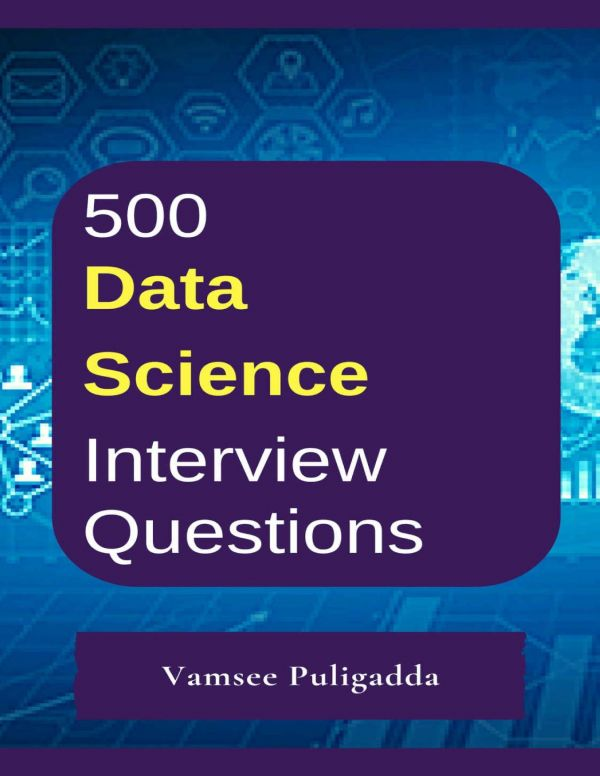

### Introduction

The goal this work - defining the most popular Data Science Questions for possible  creating, printing, selling   or  distribution data science content like the books, online articles, videos or interactive text-based platform placed on online education  platforms like Dataquest or  O'Reill Media and etc.

Now the most popular resource in the format  Question <-> Answer is set of web servers building by [Stack Exchange](https://stackexchange.com). Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to  goal of this work:

[Data Science](https://datascience.stackexchange.com/)

[Cross Validated](https://stats.stackexchange.com/) — a statistics site

[Artificial Intelligence]()

[Mathematics](https://ai.stackexchange.com/)

[Stack Overflow](https://stackoverflow.com/)

In this work will using data getting  from Stack Exchange Data Explorer [(SEDE)](https://data.stackexchange.com/datascience/query/new) 


### Getting and explore Data

In the right side on upper median horizontal line  Stack Exchange Data Explorer [(SEDE)](https://data.stackexchange.com/datascience/query/new) shows  the names and the descriptions of tables of databases - the  database has 29 tables and the general information  schema of its database can find and download from this <a href="https://i.stack.imgur.com/AyIkW.png" target="_blank"> link.</a>.

Extract from Post table next columns for defining  DS questions in  2020 year  using this SQL query for further work and save it in the   file `ds_questions_2020.csv`


`
SELECT
    Id,
    PostTypeId,
    CreationDate,
    Title,
    OwnerUserId,
    Tags,  
    Score, 
    ViewCount, 
    AnswerCount, 
    CommentCount, 
    FavoriteCount
FROM 
    Posts 
WHERE 
PostTypeId = 1 AND  CreationDate LIKE '%2020%';`


import request modules and  import `ds_questions_2020.csv` to pandas `ds_quests_2020` dataframe and expore it.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

ds_quests_2020 = pd.read_csv("data/ds_questions_2020.csv", parse_dates = ["CreationDate"])
ds_quests_2020.head()

,Id,PostTypeId,CreationDate,Title,OwnerUserId,Tags,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount
0,82518,1,2020-10-03 19:21:11,Confusion matrix to check results,105599.0,<machine-learning><confusion-matrix>,2,98,2,0,NaN
1,82521,1,2020-10-03 19:39:05,Practical difference between Bayesian Neural N...,90979.0,<machine-learning><neural-network><bayesian><g...,0,40,0,0,NaN
2,82523,1,2020-10-03 19:57:42,Loss function in order to find the most certai...,105600.0,<classification><loss-function><metric>,1,17,0,1,NaN
3,82526,1,2020-10-03 21:56:04,Training a Variational Autoencoder (VAE) for N...,103063.0,<machine-learning><autoencoder><sampling><gene...,0,17,0,0,NaN
4,82527,1,2020-10-03 21:56:59,Hypothesis Space of Bayes' Optimal Classifier?,105601.0,<naive-bayes-classifier><bayesian>,0,17,0,0,NaN


In [2]:
ds_quests_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             7303 non-null   int64         
 1   PostTypeId     7303 non-null   int64         
 2   CreationDate   7303 non-null   datetime64[ns]
 3   Title          7303 non-null   object        
 4   OwnerUserId    7270 non-null   float64       
 5   Tags           7303 non-null   object        
 6   Score          7303 non-null   int64         
 7   ViewCount      7303 non-null   int64         
 8   AnswerCount    7303 non-null   int64         
 9   CommentCount   7303 non-null   int64         
 10  FavoriteCount  964 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 627.7+ KB


### Cleaning data

All non-text columns in the Posts table had integer type, because fix data types to correct in the dataframe in coiumns `FavoriteCount`, `OwnerUserId`. Fill  NaN  value by zero for column `FavoriteCount`, 
and check cleaned dataframe dimension info and view `Tags` column. 

In [3]:
# Fill zero 'FavoriteCount' column NaN values
ds_quests_2020["FavoriteCount"] = ds_quests_2020["FavoriteCount"].fillna(0)

# Drop NaN values in the 'OwnerUserId' and reset index
ds_quests_2020.dropna(inplace = True)
ds_quests_2020.reset_index(inplace=True)

# Convert float type to integer for "OwnerUserId" and FavoriteCount"
ds_quests_2020["OwnerUserId"] = ds_quests_2020["OwnerUserId"].astype("int64")
ds_quests_2020["FavoriteCount"] = ds_quests_2020["FavoriteCount"].astype("int64")

# convert tag symbols "<>" ,  "<" ">" to list separator symbols
ds_quests_2020["Tags"] = ds_quests_2020["Tags"].\
                            str.replace("><",",").str.replace("<", "").\
                            str.replace(">", "").str.split(",")

# View cleaned dataset
ds_quests_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7270 entries, 0 to 7269
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   index          7270 non-null   int64         
 1   Id             7270 non-null   int64         
 2   PostTypeId     7270 non-null   int64         
 3   CreationDate   7270 non-null   datetime64[ns]
 4   Title          7270 non-null   object        
 5   OwnerUserId    7270 non-null   int64         
 6   Tags           7270 non-null   object        
 7   Score          7270 non-null   int64         
 8   ViewCount      7270 non-null   int64         
 9   AnswerCount    7270 non-null   int64         
 10  CommentCount   7270 non-null   int64         
 11  FavoriteCount  7270 non-null   int64         
dtypes: datetime64[ns](1), int64(9), object(2)
memory usage: 681.7+ KB


In [4]:
ds_quests_2020.head()

,index,Id,PostTypeId,CreationDate,Title,OwnerUserId,Tags,Score,ViewCount,AnswerCount,CommentCount,FavoriteCount
0,0,82518,1,2020-10-03 19:21:11,Confusion matrix to check results,105599,"[machine-learning, confusion-matrix]",2,98,2,0,0
1,1,82521,1,2020-10-03 19:39:05,Practical difference between Bayesian Neural N...,90979,"[machine-learning, neural-network, bayesian, g...",0,40,0,0,0
2,2,82523,1,2020-10-03 19:57:42,Loss function in order to find the most certai...,105600,"[classification, loss-function, metric]",1,17,0,1,0
3,3,82526,1,2020-10-03 21:56:04,Training a Variational Autoencoder (VAE) for N...,103063,"[machine-learning, autoencoder, sampling, gene...",0,17,0,0,0
4,4,82527,1,2020-10-03 21:56:59,Hypothesis Space of Bayes' Optimal Classifier?,105601,"[naive-bayes-classifier, bayesian]",0,17,0,0,0


###  Most Used and Most Viewed

Look at  to the columns that have explicit numerical values and view their statistical values using pd.describe()

In [5]:
ds_quests_2020[['Score', 'ViewCount', 'AnswerCount', 'FavoriteCount']].describe()

,Score,ViewCount,AnswerCount,FavoriteCount
count,7270.000000,7270.000000,7270.000000,7270.000000
mean,0.971114,188.317469,0.824897,0.150481
std,1.495715,706.524214,0.817515,0.514392
min,-4.000000,2.000000,0.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000
50%,1.000000,42.000000,1.000000,0.000000
75%,1.000000,103.000000,1.000000,0.000000
max,34.000000,19971.000000,10.000000,11.000000


Create pivot dataframe  for tags and other values in two steps - 1) Create pivot dictionary , 2) export dictionary to data frame and view it:   

In [6]:
# Create dictionary for pivot table of tags and other value 
quest_dict_2020_pvt = {}
"""
Conversion label table
tags -> tag_name
tags_count -> count 
Score ->score
ViewCount  - > view_count
AnswerCount  -> answer_count
CommentCount -> comment_count
FavoriteCount  -> favorite_count
"""
for i, row in enumerate(ds_quests_2020["Tags"]):
    for tag in row:
        if not tag in quest_dict_2020_pvt:
            quest_dict_2020_pvt[tag] = [0, 0, 0, 0, 0, 0]
        quest_dict_2020_pvt[tag][0] +=1
        quest_dict_2020_pvt[tag][1] += ds_quests_2020.loc[i,"Score"]
        quest_dict_2020_pvt[tag][2] += ds_quests_2020.loc[i,"ViewCount"]
        quest_dict_2020_pvt[tag][3] += ds_quests_2020.loc[i,"AnswerCount"]
        quest_dict_2020_pvt[tag][4] += ds_quests_2020.loc[i,"CommentCount"]
        quest_dict_2020_pvt[tag][5] += ds_quests_2020.loc[i,"FavoriteCount"]


# Convert dictionare to dataframe
quest_tags_2020_pvt_df = pd.DataFrame.from_dict(quest_dict_2020_pvt, 
                                                orient = "index")
#Reset index
quest_tags_2020_pvt_df.reset_index(inplace=True)
# Rename columns of dataframe
quest_tags_2020_pvt_df = quest_tags_2020_pvt_df.rename(
                                    columns = {"index":"tag_name", 
                                               0: "count", 1:"score",
                                               2: "view_count", 3:"answer_count",
                                               4: "comment_count", 
                                               5:"favorite_count"})
# Sort by tags count descending
quest_tags_2020_pvt_df = quest_tags_2020_pvt_df.sort_values("count",
                                                            ascending=False)

quest_tags_2020_pvt_df.reset_index(inplace=True, drop = True)
# view first 15 rows
quest_tags_2020_pvt_df.head(15)

,tag_name,count,score,view_count,answer_count,comment_count,favorite_count
0,machine-learning,2144,2287,359805,1967,1832,386
1,python,1366,1159,385032,1194,1244,179
2,deep-learning,1033,915,159497,767,789,146
3,neural-network,839,811,126359,685,647,125
4,keras,664,561,225206,480,587,107
5,classification,622,673,88277,585,572,83
6,tensorflow,554,415,160076,381,362,55
7,nlp,495,537,99246,415,376,91
8,scikit-learn,494,498,139930,479,460,77
9,time-series,378,314,44636,229,255,53


Extract first 15 rows and plot correlation matrix for popular `tag_name`.

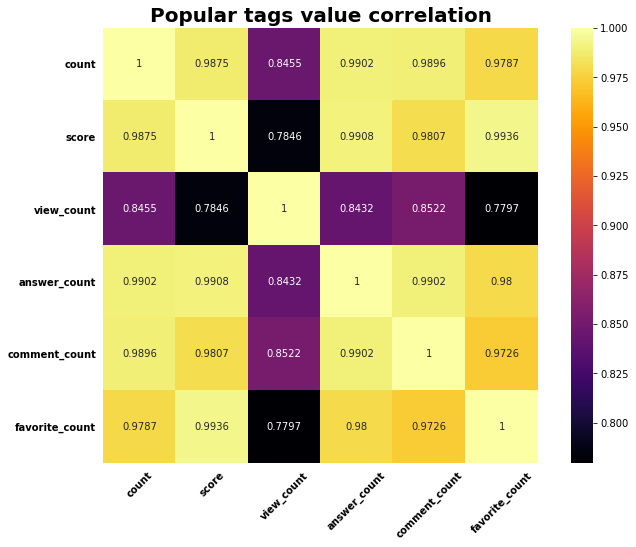

In [7]:
# Create `quest_tags_2020_pop_df'
quest_tags_2020_pop_df = quest_tags_2020_pvt_df.iloc[0:15, :].copy()
quest_tags_2020_pop_df.reset_index(inplace=True, drop = True)

# Plot correlation matrix
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(quest_tags_2020_pop_df.corr(), annot = True, cmap = "inferno",
            fmt='.4g', square=True,);
ax.set_title('Popular tags value correlation', fontsize=20, fontweight = "bold")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, fontweight = "bold")
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontweight = "bold")
ax.tick_params(bottom=False, left=False)

The plot above show a strong correlation from 0.785 to 0.9938 between top 15 tag_name values. Look at the popular tag_name and their dispersions  for different values.

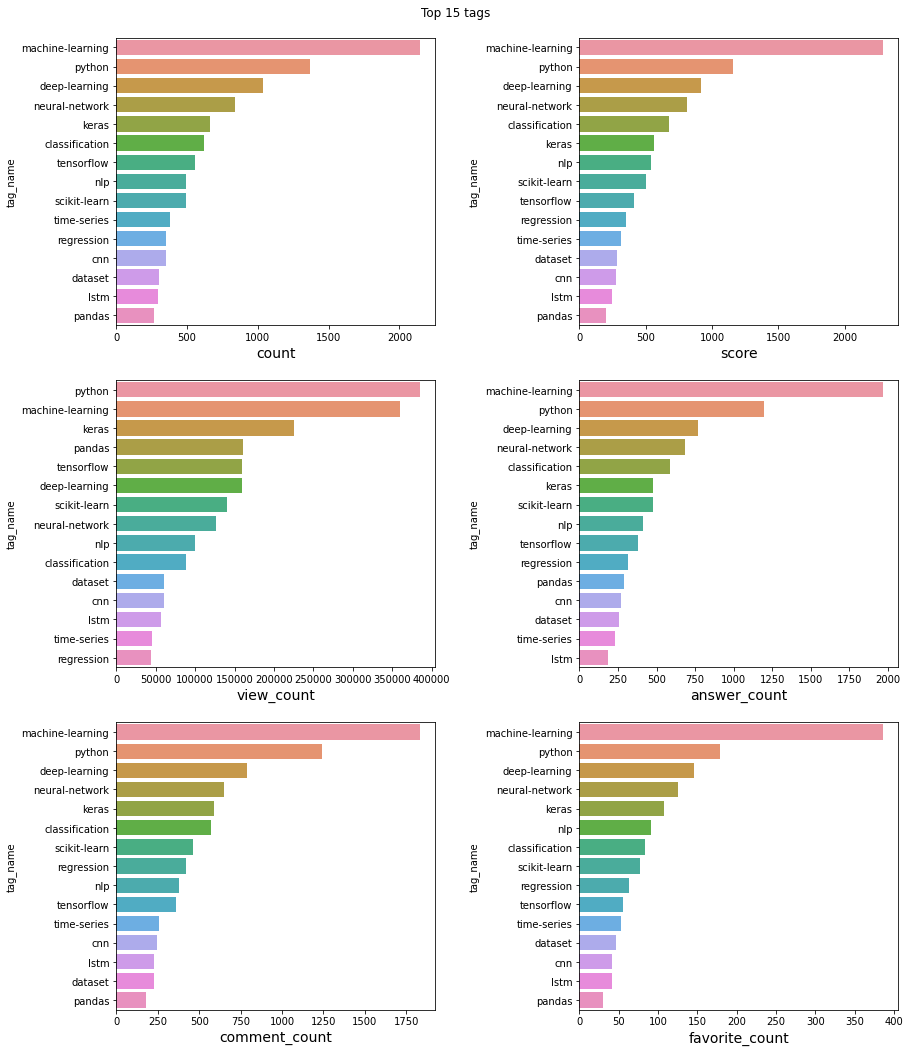

In [8]:
# Set output columns
plot_columns = ["count", "score", "view_count", "answer_count",
                "comment_count", "favorite_count"]

fig = plt.figure(figsize=(13, 15))
for i, column in enumerate (plot_columns):
    ax = fig.add_subplot(3,2,i+1)   
    quest_tags_2020_pop_df = quest_tags_2020_pop_df.sort_values(column,
                                                                 ascending=False)
    
    
    sns.barplot(x = column, y = "tag_name", data = quest_tags_2020_pop_df) 
    quest_tags_2020_pop_df.reset_index(inplace=True, drop=True)
    ax.set_xlabel(column, fontsize=14)
    plt.suptitle("Top 15 tags")
    plt.tight_layout(pad=2)     

This plot show that first three hot  themes of 2020 year for Data Science part of Stack owerflow Machine-Learning, Python and Deep-Learning ( except in the  view_count plot).

I transform   `quest_tags_2020_pop_df` and plot it after transformation with MinMaxScaler.

In [9]:
# Extract numerical values to x
x = quest_tags_2020_pop_df.iloc[:,1:] 
# Call MinMaxScaler() method
min_max_scaler = preprocessing.MinMaxScaler()
# Normalization data for values in range 0 - 1.0
x_scaled = min_max_scaler.fit_transform(x)
# Create datafame for normalized data
quest_tags_2020_top15_norm =  quest_tags_2020_pop_df.copy()
# Assign normalized values for columns 1 - 6
quest_tags_2020_top15_norm.iloc[:,1:] = x_scaled
quest_tags_2020_top15_norm

,tag_name,count,score,view_count,answer_count,comment_count,favorite_count
0,machine-learning,1.000000,1.000000,0.926080,1.000000,1.000000,1.000000
1,python,0.585729,0.460029,1.000000,0.566704,0.644068,0.418539
2,deep-learning,0.408413,0.343226,0.339136,0.327354,0.368644,0.325843
3,neural-network,0.305112,0.293442,0.242035,0.281390,0.282688,0.266854
4,keras,0.211928,0.173767,0.531677,0.166480,0.246368,0.216292
5,nlp,0.121938,0.162279,0.162588,0.130045,0.118644,0.171348
6,classification,0.189563,0.227382,0.130447,0.225336,0.237288,0.148876
7,scikit-learn,0.121406,0.143609,0.281801,0.165919,0.169492,0.132022
8,regression,0.046858,0.074198,0.000000,0.073991,0.146489,0.092697
9,tensorflow,0.153355,0.103877,0.340833,0.110987,0.110169,0.070225


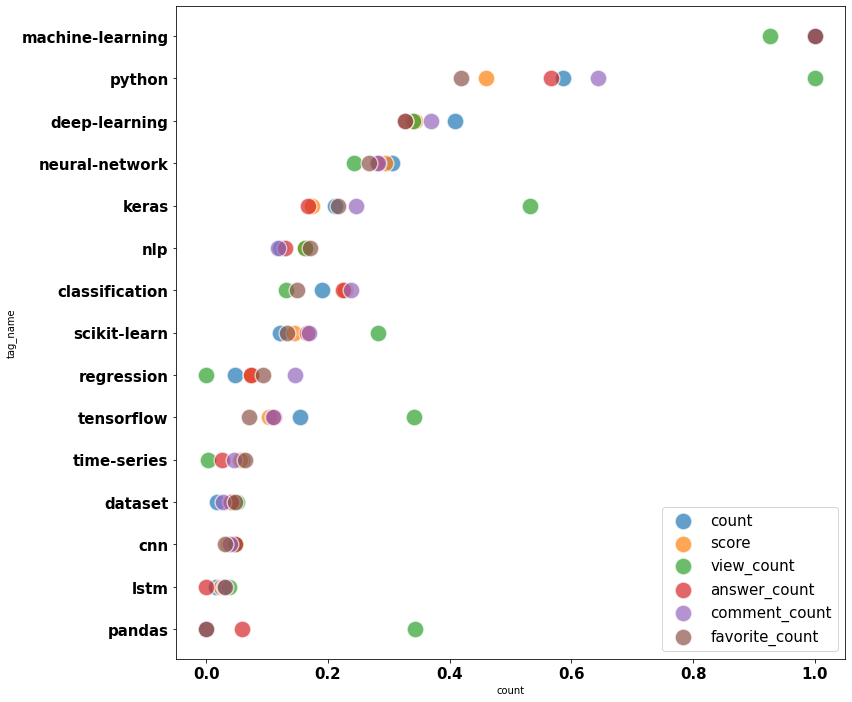

In [10]:
fig = plt.figure(figsize=(12, 12))

for i, column in enumerate(plot_columns):
    sns.scatterplot(data = quest_tags_2020_top15_norm, x =column, 
                    y = "tag_name", label = column,
                    s=280, alpha=0.7)
    quest_tags_2020_top15_norm.reset_index(inplace=True, drop=True)
    
plt.xticks(fontsize=15, fontweight = "bold")
plt.yticks(fontsize = 15, fontweight = "bold")
plt.legend(loc=4, fontsize=15)

This plot show three leaders of questions - Machine-Learning, Python and Deep-Learning.

## Definition growth question Machine-Learning by year and quarter from start for Q12021 and general stats for tags.

First step - run this query.

`SELECT        Id,
              Title,
              CreationDate,
              DeletionDate,
              OwnerUserId,
              Tags,  
              Score, 
              ViewCount, 
              AnswerCount, 
              CommentCount, 
              FavoriteCount
FROM Posts 
WHERE PostTypeId = 1 AND  CreationDate < '2021-04-01' ;`
and save it to  file 'all_quests_2021_04_01.csv' and repeat all step described above but without dictionary - using only pandas methods.

In [11]:
# Read CSV and parse date
all_quests = pd.read_csv("data/all_quests_2021_04_01.csv", parse_dates = ["CreationDate"])
# Remove redundand colummns
all_quests = all_quests.drop(["DeletionDate", "Id"], axis = 1).copy()
all_quests.reset_index(inplace=True, drop=True)
# Fill zero NaN value for favorite count
all_quests["FavoriteCount"] = all_quests["FavoriteCount"].fillna(0)
# Drop NaN values
all_quests.dropna(inplace = True)
# Convert float to int
all_quests["OwnerUserId"] = all_quests["OwnerUserId"].astype("int64")
# Convert tags to list
all_quests["Tags"] = all_quests["Tags"].str.replace("><",",").\
                                        str.replace("<","").\
                                        str.replace(">","").\
                                        str.split(",")
# Extract year and quart to new columns
all_quests["year_quart"] = all_quests["CreationDate"].dt.year.astype(str) + "Q0"\
                                + all_quests["CreationDate"].dt.quarter.astype(str)
# Drop redundant columns
all_quests = all_quests.drop(["Title", "CreationDate", 
                              "OwnerUserId"], axis = 1).copy()

# Rename columns
all_quests = all_quests.rename(columns = {"Tags":"tag_name", 
                                          "Score": "score_number", 
                                          "ViewCount":"view_number",
                                          "AnswerCount":"answer_number",
                                          "CommentCount":"comment_number",
                                          "FavoriteCount":"favorit_number"})
# Insert tag_number column
all_quests.insert(1, "tag_number", 1)
# Convert list to string for further grouping
all_quests["tag_name"] = all_quests["tag_name"].str.join(" ") 
# Make grouped table
all_quests_gb = all_quests.groupby(["tag_name","year_quart"])[
                                    "tag_number", "score_number",
                                    "view_number", "answer_number",
                                    "comment_number", "favorit_number"].\
                                     agg("sum")
all_quests_gb.reset_index(inplace=True)

# Define general stats of tags from start to 04-01-2021
# Spilt tag_name to and create separate dataframe for counting multitags
tag_stat = all_quests_gb["tag_name"].str.split(" ", expand = True) 
tag_stat = tag_stat.rename(columns = {0: "tag_name", 1: "two_tags", 
                                      2: "three_tags", 3: "four_tags",
                                      4: "five_tags"})
# Add column for single tags counting
tag_stat.insert(1, column = "one_tag", value = 0)
#Fill values for forther grouping 
tag_stat["one_tag"] = tag_stat.apply(
                lambda row: 1 if row["two_tags"] == None else 0, axis = 1)
tag_stat_columns = ['two_tags', 'three_tags', 'four_tags', 'five_tags']

for column in tag_stat_columns:
    tag_stat[column] = tag_stat.apply(
                lambda row: 0 if row[column] == None else 1, axis = 1)
tag_stat_columns_gb = ['one_tag', 'two_tags', 'three_tags', 
                       'four_tags', 'five_tags']
#Group table tag_stat
tag_stat_gb =  tag_stat.groupby(["tag_name"])[tag_stat_columns_gb].agg("sum")
tag_stat_gb["total_tags"] = tag_stat_gb["one_tag"] +\
                            tag_stat_gb['two_tags'] +\
                            tag_stat_gb["three_tags"] +\
                            tag_stat_gb["four_tags"] +\
                            tag_stat_gb["five_tags"]
# Sort values for total tags
tag_stat_gb = tag_stat_gb.sort_values("total_tags", ascending = False)
tag_stat_gb.reset_index(inplace = True)
tag_stat_gb.head(10)

,tag_name,one_tag,two_tags,three_tags,four_tags,five_tags,total_tags
0,machine-learning,28,7618,6716,4479,2300,21141
1,python,24,3116,2642,1613,726,8121
2,neural-network,28,1582,1253,752,353,3968
3,deep-learning,20,1203,983,598,274,3078
4,classification,25,971,724,360,143,2223
5,keras,18,548,432,231,74,1303
6,nlp,27,576,401,206,77,1287
7,r,26,636,390,168,56,1276
8,scikit-learn,17,434,304,165,64,984
9,time-series,22,382,250,127,52,833


Table above shows that in most case questions about Data Science have two - four tags and have relation into several disciplines - for example typical question has tags for example ```machine-learning, python, scikit-learn```. 

Leaders by descending :

* machine-learning
* python
* neural-network
* deep-learning
* classification
* keras
* nlp
* r
* scikit-learn
  
 

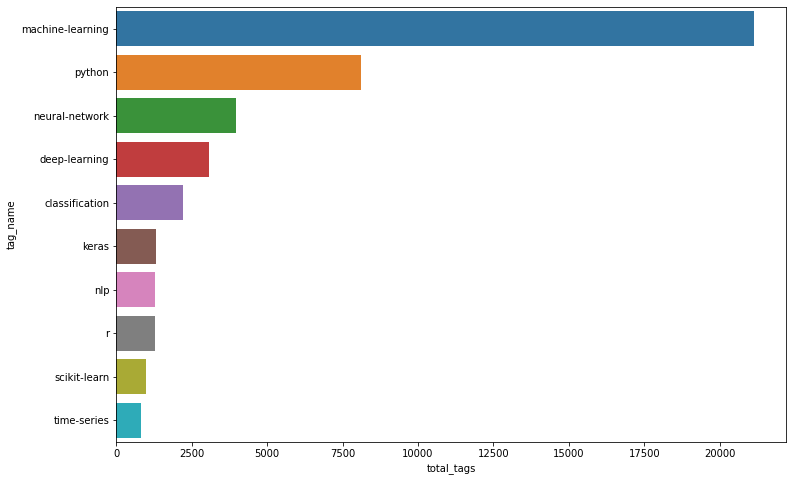

In [12]:
tag_stat_top_10 = tag_stat_gb.iloc[0:10, [0,6]]
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.barplot(y="tag_name", x="total_tags",data = tag_stat_top_10);

Extract tags with label machine learning and prepare data for viewing.

In [13]:
# Define required string
ml_tag = "machine-learning"
# Extract from dataframe rows contains string
ml_tag_df = all_quests_gb[all_quests_gb["tag_name"].str.contains(ml_tag,
                                        regex=False) == True]
# define redundant columns and drop its
ml_tag_drop_columns = ['score_number', 'view_number', 'answer_number',
                   'comment_number', 'favorit_number']
ml_tag_df = ml_tag_df.drop(ml_tag_drop_columns, axis = 1).copy()
# Extract  total number  tags for checking
ml_tag_check = ml_tag_df.groupby(["year_quart"])[["tag_number"]].agg("sum") 
#ml_tag_df = ml_tag_df.drop('tag_number', axis = 1).copy()
# Define new columns with number dispersion
new_ml_tag_columns =['ml_one_tag', 'ml_two_tags', 'ml_three_tags', 'ml_four_tags',
       'ml_five_tags', 'ml_total_tags']
# Add new columns to dataframe
for i, column in enumerate(new_ml_tag_columns):
    ml_tag_df.insert(i+3, column, 0)
    
def tags_number(df, row_name):
    """
    Count words in the row and filling corresponding columns value in 
    the 'tag_number' column.
    One word - column "one_tag", two words - column "two_tags" and etc..
    Experiment instead lambda above - for assign values in dataframe use only
    df.at
    """
    for index, row in df.iterrows():
        tags_no = len(row[row_name].split())
        if tags_no == 1:
            df.at[index, "ml_one_tag"] = df.loc[index, "tag_number"]
        if tags_no ==2:
            df.at[index,"ml_two_tags"] = df.loc[index, "tag_number"]
        if tags_no == 3:
            df.at[index,"ml_three_tags"] = df.loc[index, "tag_number"]
        if tags_no == 4:
            df.at[index,"ml_four_tags"] = df.loc[index, "tag_number"]
        if tags_no == 5:
            df.at[index,"ml_five_tags"] = df.loc[index, "tag_number"]
    return df

# Filling columns "xxx_tags" with corresponding number
ml_tag_df = tags_number(ml_tag_df, "tag_name")

# Grouping by year_quart
tag_group_lst = ['ml_one_tag', 'ml_two_tags', 'ml_three_tags', 'ml_four_tags',
            'ml_five_tags', 'ml_total_tags']
ml_tag_df = ml_tag_df.groupby(["year_quart"])[tag_group_lst].agg("sum").copy()

# Calculate total ml tags
for column in tag_group_lst[:-1]:
    ml_tag_df['ml_total_tags'] += ml_tag_df[column]

# Check final values
ml_tag_df['ml_total_tags'] == ml_tag_check["tag_number"]

year_quart
2014Q02    True
2014Q03    True
2014Q04    True
2015Q01    True
2015Q02    True
2015Q03    True
2015Q04    True
2016Q01    True
2016Q02    True
2016Q03    True
2016Q04    True
2017Q01    True
2017Q02    True
2017Q03    True
2017Q04    True
2018Q01    True
2018Q02    True
2018Q03    True
2018Q04    True
2019Q01    True
2019Q02    True
2019Q03    True
2019Q04    True
2020Q01    True
2020Q02    True
2020Q03    True
2020Q04    True
2021Q01    True
dtype: bool

In [14]:
# Counting total  DS questions and  separate its by year and quarter
all_quests_gb.reset_index(inplace=True)
all_qusts_total_df = all_quests_gb.groupby(["year_quart"])[["tag_number"]].\
                                            agg("sum")

# Add new column with total DS question number 
ml_tag_final_df =  ml_tag_df.merge(all_qusts_total_df, 
                                   how = "inner",
                                   left_on = "year_quart",
                                   right_on = "year_quart")
# Rename last columns
ml_tag_final_df = ml_tag_final_df.rename(columns = {"tag_number":"total_tags_numbers"})
# Prepare final dataset for preview
ml_tag_final_df.reset_index(inplace = True)
ml_tag_final_df = ml_tag_final_df.sort_values("year_quart", ascending = False)
ml_tag_final_df.reset_index(inplace = True, drop = True)
ml_tag_final_df.head(10)

,year_quart,ml_one_tag,ml_two_tags,ml_three_tags,ml_four_tags,ml_five_tags,ml_total_tags,total_tags_numbers
0,2021Q01,19,82,117,128,155,501,1848
1,2020Q04,17,71,108,99,167,462,1528
2,2020Q03,17,54,150,151,166,538,1750
3,2020Q02,13,74,161,171,197,616,2248
4,2020Q01,18,70,154,173,191,606,1775
5,2019Q04,21,66,122,132,144,485,1489
6,2019Q03,26,86,163,169,125,569,1731
7,2019Q02,22,97,180,145,123,567,1777
8,2019Q01,22,108,164,143,130,567,1715
9,2018Q04,19,66,118,107,112,422,1261


## Plotting final data

### Method 1. Standard horizontal plot without stacking

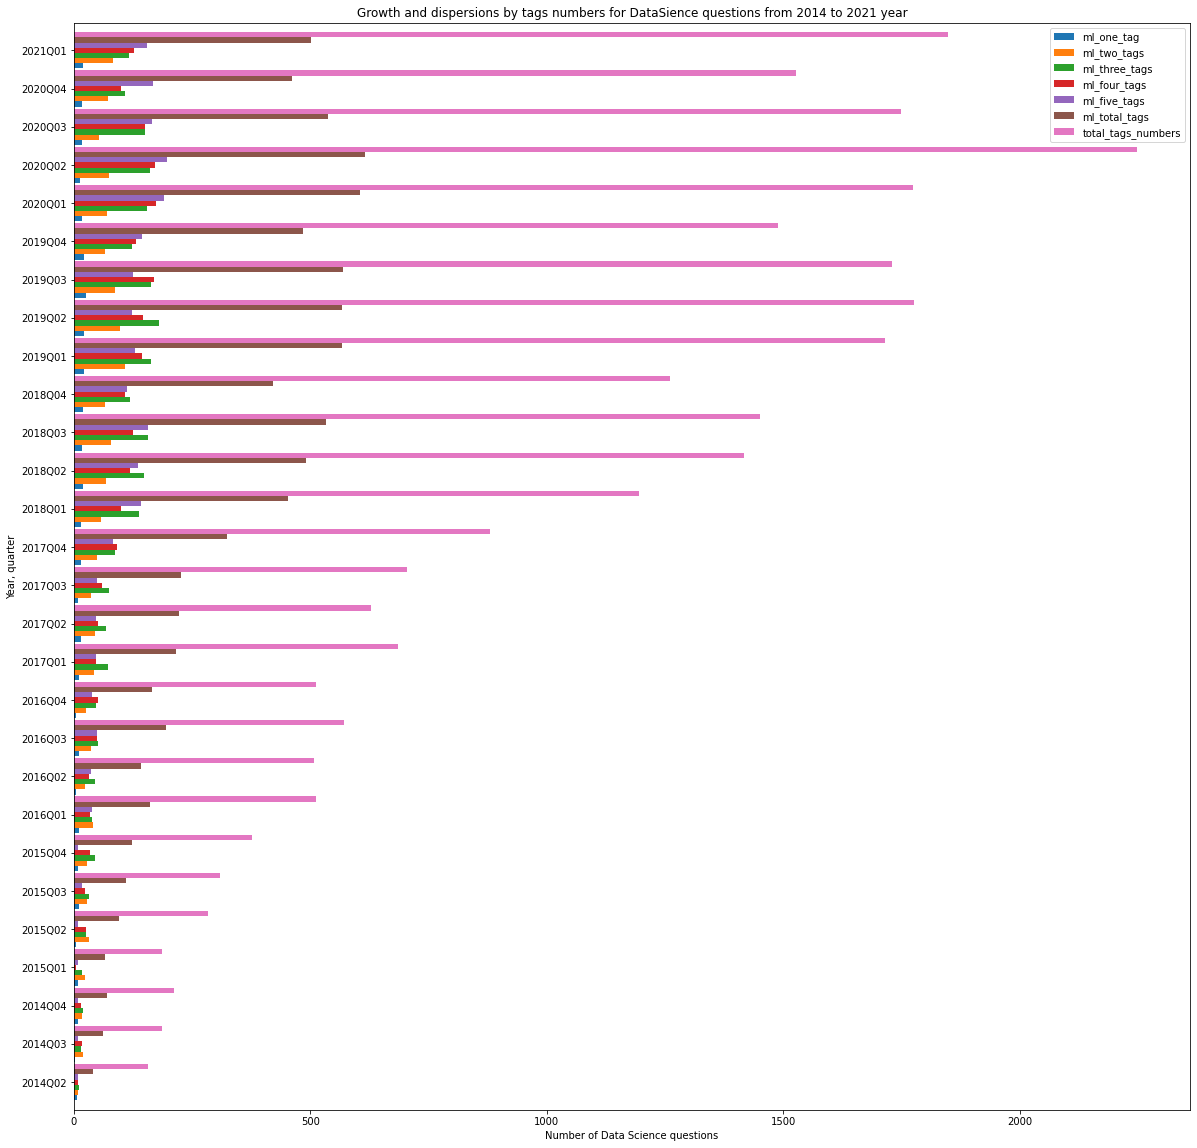

In [15]:
ml_tag_final_df = ml_tag_final_df.sort_values("year_quart", ascending = True)
ml_tag_final_df.set_index('year_quart').plot(kind='barh', width = 0.95, figsize = (20, 20));
plt.title ("Growth and dispersions by tags numbers for DataSience questions from 2014 to 2021 year");
plt.ylabel("Year, quarter" )
plt.xlabel("Number of Data Science questions");

### Method 2. Stacked horizontal bar with real sum of tags.

If I can use standard  bar plot for dataframe  with  option `stacked = True`, but as  a result  we get a distorted picture because with `stacked = True` the values ​​in the string will simply add up to each other. I use next function for to display summary valid data. Possible disadvantages of this function -  lost of colors when 
difference between some elements  is equal zero.

In [16]:
def stacked_bar(df):
    for index, row in df.iterrows():
        # Extract values
        row_values = row.tolist()[1:]
        # Extract column index name
        column_index = list(row.index)[1:]
        # Zip values and indexes
        zip_val_index = list(zip(row_values, column_index))
        # Sort by number ascending
        zip_val_index.sort()
        # Convert tuple to list
        for i in range(len(zip_val_index)):
            zip_val_index[i] = list(zip_val_index[i])
        # Filliing new list values for first elements and delta between
        # previous and next values of list
        delta_list = []
        for i in range(len(zip_val_index) -1):
            if i == 0:
                delta_list.append(zip_val_index[i][0])
            delta_list.append(zip_val_index[i+1][0] - zip_val_index[i][0])
        
        # Update values for stacked plot without sum and convert to tuple
        for i in range(len(zip_val_index)):
            zip_val_index[i][0] = delta_list[i]
            zip_val_index[i] = tuple(zip_val_index[i])
        
        # Unzip separate indexeses and values
        delta_val, column_name = zip(*zip_val_index)
        # Assign new valies to df row
        for i, column in enumerate(column_name):
            df.at[index, column] = delta_val[i]
    return df
    
# For to prevent the original dataframe from being modified, use copy when transfer dataframe to finction!!
ml_tag_final_stacked = stacked_bar(ml_tag_final_df.copy()).sort_values("year_quart", ascending = True)
ml_tag_final_stacked 

,year_quart,ml_one_tag,ml_two_tags,ml_three_tags,ml_four_tags,ml_five_tags,ml_total_tags,total_tags_numbers
27,2014Q02,6,0,3,0,2,30,115
26,2014Q03,3,3,7,1,5,42,126
25,2014Q04,8,3,1,6,1,50,143
24,2015Q01,0,6,9,5,4,41,121
23,2015Q02,4,6,1,16,5,64,187
22,2015Q03,10,5,3,5,8,79,199
21,2015Q04,8,19,10,6,1,79,254
20,2016Q01,10,3,0,23,5,119,351
19,2016Q02,4,20,9,8,4,96,367
18,2016Q03,11,26,1,1,11,145,376


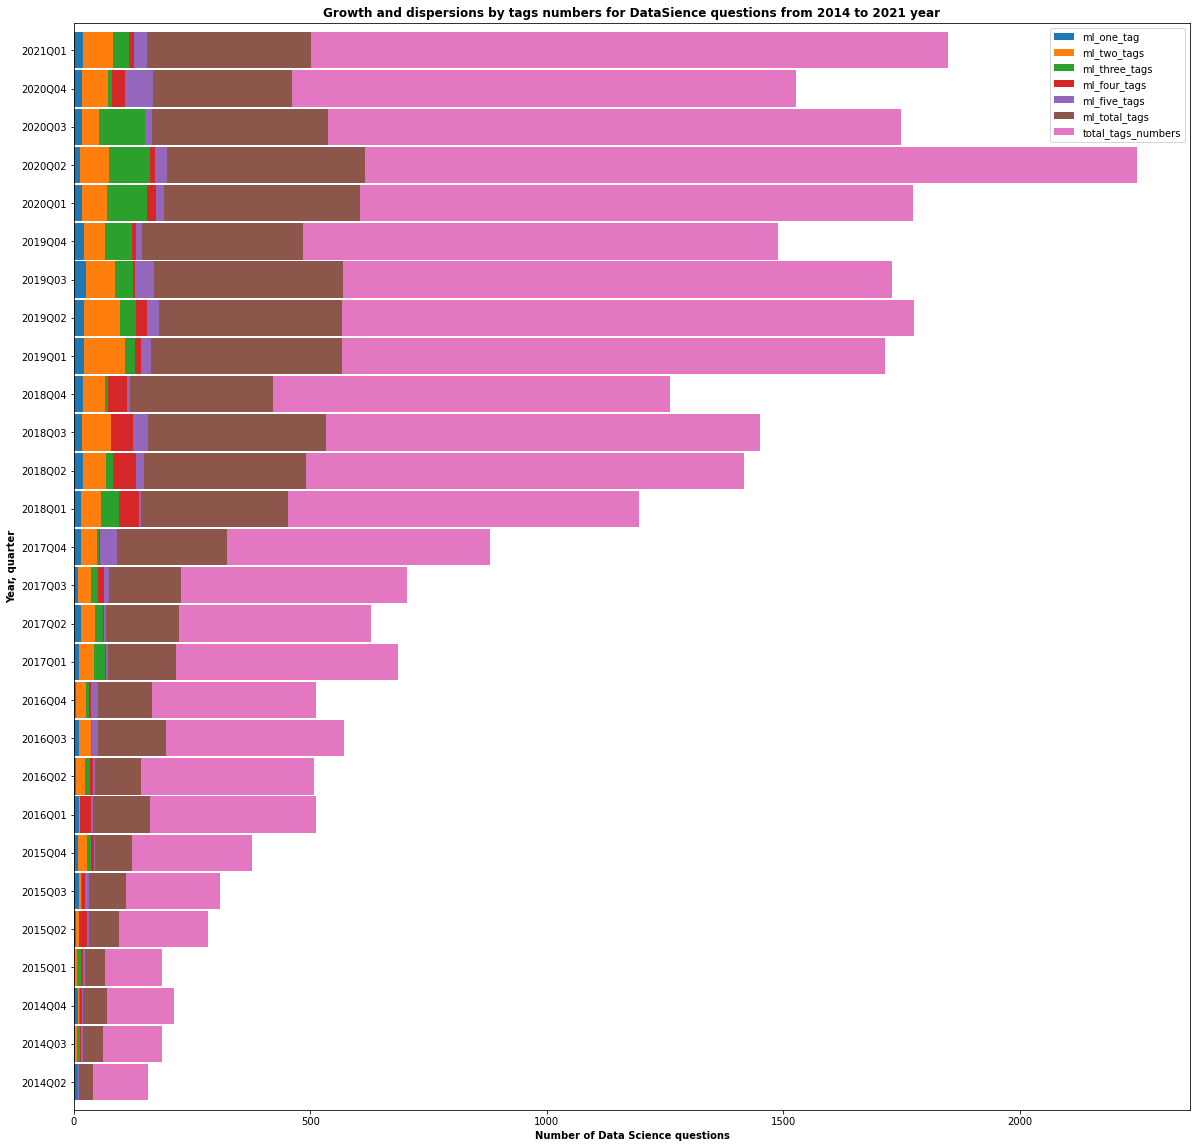

In [17]:
ml_tag_final_stacked.set_index('year_quart').plot(kind='barh', stacked = True, width = 0.95, figsize = (20, 20));
plt.title ("Growth and dispersions by tags numbers for DataSience questions from 2014 to 2021 year", fontweight = "bold");
plt.ylabel("Year, quarter" , fontweight = "bold")
plt.xlabel("Number of Data Science questions", fontweight = "bold");

### Method 3. Simple line 

Text(0, 0.5, 'Number of Data Science questions')

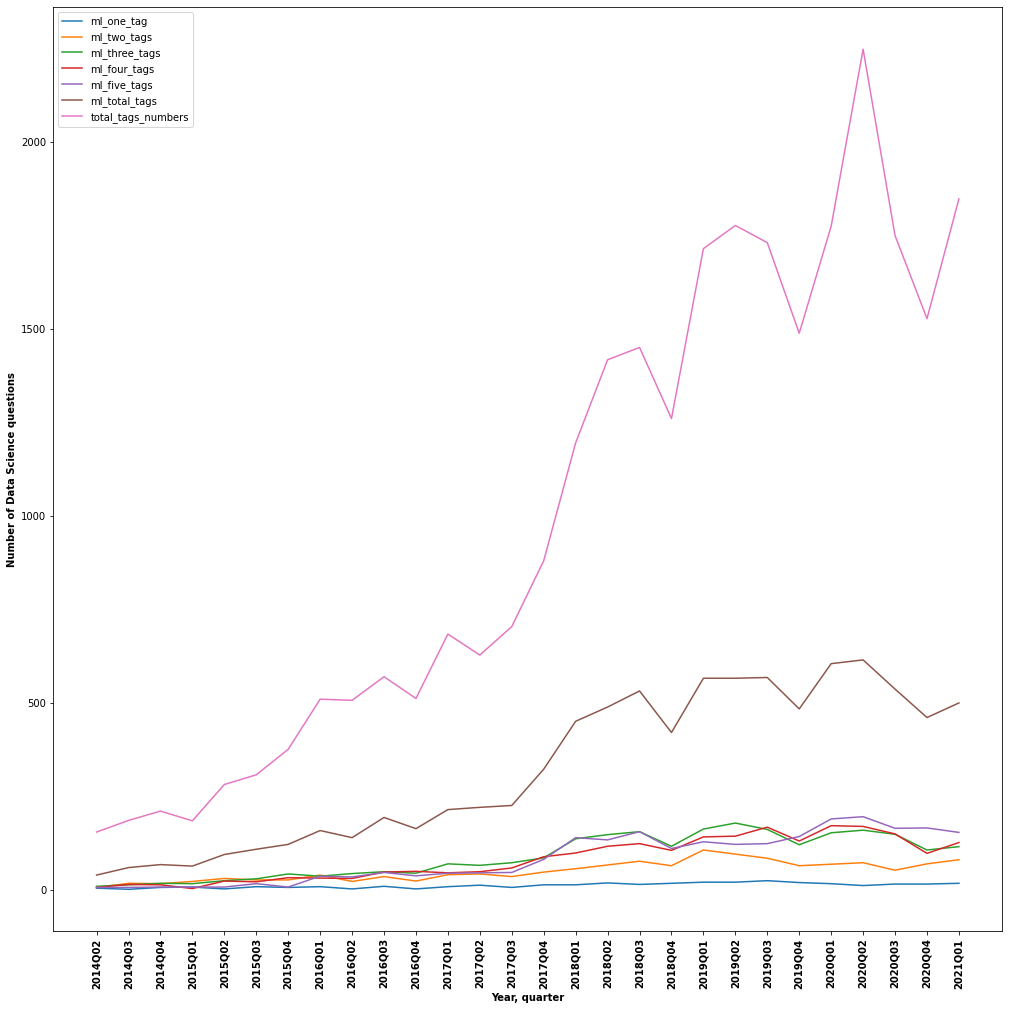

In [18]:
ml_tag_final_df.set_index('year_quart').plot(kind = "line", figsize = (17, 17))
plt.xticks( np.arange(28),ml_tag_final_df["year_quart"], rotation = "90", fontweight = "bold");
plt.xlabel("Year, quarter", fontweight = "bold" )
plt.ylabel("Number of Data Science questions", fontweight = "bold")

### Method 4 . Scatter plot

Text(0, 0.5, 'Number of Data Science questions')

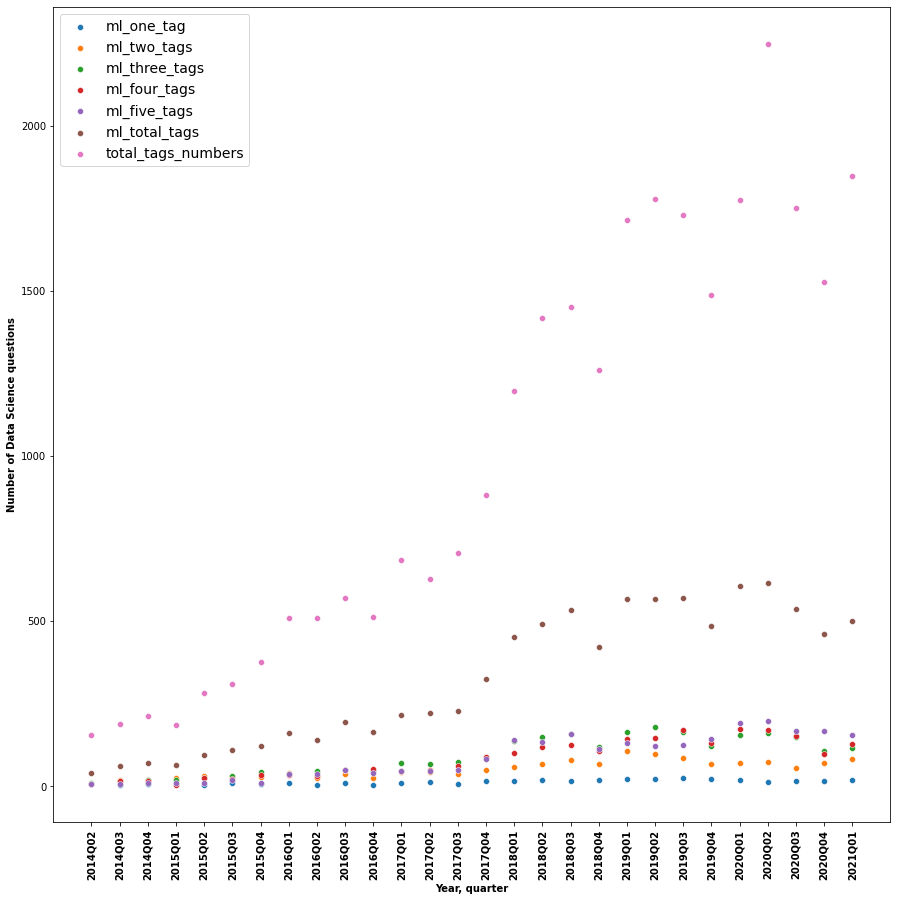

In [19]:
tags = list(ml_tag_final_df.columns)[1:]
fig = plt.figure(figsize = (15, 15))
for tag in tags:
    ax = sns.scatterplot(data=ml_tag_final_df, x="year_quart", y=tag, sizes=(200, 1500), label = tag)
    plt.legend(loc='upper left', fontsize = 14);
plt.xticks( np.arange(28),ml_tag_final_df["year_quart"], rotation = "90", fontweight = "bold");
plt.xlabel("Year, quarter", fontweight = "bold" )
plt.ylabel("Number of Data Science questions", fontweight = "bold")

## Conclusion

Based of tables ans plots above I see that share of machine learning questions from  general data science questions approximate equal 30 - 40 % of total questions that quickly  growth by 2014 - 2020 year and little drop in 2021 year. The most of questions of machine learning have direct connection with several binding disciplines - for example keras, tensorflow and etc. Create content only clear machine learning not profitable because it share very small,  but for defining commercially successful content require additional analysis for relations with   binding disciplines.


Created on Apr 09, 2021

@author: Vadim Maklakov, used some ideas from public Internet resources.

© 3-clause BSD License

Software environment: 

Debian 10 

Python 3.8.7

required next imported python modules:

matplotlib.pyplot 

numpy 

pandas

seaborn

sklearn 

warnings